# Quick start
```{warning}
It is currently under devellopement. Please contact me before using it.
```

## Load DICe output
[DICe](http://dicengine.github.io/dice/) is an open source software to performe Digital Image Correlation.

In [1]:
adr_DICe='/data/Manips/Columnar_Ice/CI02/DIC_Analysis/1n_analysis/n16/'

In [2]:
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import xarray_dic.loadDIC as ldDIC
import xarray_symTensor2d.xarray_symTensor2d as xT
import xarray_dic.xarray_dic as xd

In [4]:
ds=ldDIC.loadDICe(adr_DICe,0.01,10)

In [5]:
ds

<xarray.Dataset>
Dimensions:       (d: 2, sT: 6, time: 45, x: 96, xt: 95, y: 102, yt: 101)
Coordinates:
  * x             (x) float64 0.0 0.16 0.32 0.48 0.64 ... 14.72 14.88 15.04 15.2
  * y             (y) float64 0.0 0.16 0.32 0.48 0.64 ... 15.68 15.84 16.0 16.16
  * xt            (xt) float64 0.16 0.32 0.48 0.64 ... 14.72 14.88 15.04 15.2
  * yt            (yt) float64 0.16 0.32 0.48 0.64 ... 15.68 15.84 16.0 16.16
  * time          (time) float64 10.0 20.0 30.0 40.0 ... 420.0 430.0 440.0 450.0
Dimensions without coordinates: d, sT
Data variables:
    displacement  (time, y, x, d) float64 nan nan nan ... -0.8152 0.235 -0.8212
    strain        (time, yt, xt, sT) float64 nan nan nan nan ... nan nan nan nan
Attributes:
    unit_time:      seconds
    step_size:      0.01
    unit_position:  millimeter
    window_size:    16
    path_dat:       /data/Manips/Columnar_Ice/CI02/DIC_Analysis/1n_analysis/n16/
    DIC_software:   DICe

## Load 7D output
7D is a software to performe Digital Image Correlation written by [Pierre Vacher](https://www.univ-smb.fr/symme/members/pierre-vacher/).

In [6]:
adr_7d='/data/Manips/Columnar_Ice/CI23/DIC_Analysis/nm_analysis_0.5pc/n40/'
ds=ldDIC.load7D(adr_7d,0.01,0.005,unit_time='macro_strain')

In [7]:
ds

<xarray.Dataset>
Dimensions:       (d: 2, sT: 6, time: 11, x: 108, y: 108)
Coordinates:
  * x             (x) float64 0.0 0.4 0.8 1.2 1.6 ... 41.2 41.6 42.0 42.4 42.8
  * y             (y) float64 0.0 0.4 0.8 1.2 1.6 ... 41.2 41.6 42.0 42.4 42.8
  * time          (time) float64 0.005 0.01 0.015 0.02 ... 0.04 0.045 0.05 0.055
Dimensions without coordinates: d, sT
Data variables:
    displacement  (time, y, x, d) float64 -0.01382 0.02172 ... 0.05585 0.2646
    strain        (time, y, x, sT) float64 -0.0003503 0.009625 nan ... nan nan
Attributes:
    unit_time:      macro_strain
    step_size:      0.01
    unit_position:  millimeter
    window_size:    40
    path_dat:       /data/Manips/Columnar_Ice/CI23/DIC_Analysis/nm_analysis_0...
    DIC_software:   7D

## Load spam output
You should have all the `vtk` file in one folder sorted by time.

In [8]:
adr_data='/data/Manips/Columnar_Ice/CI23/DIC_Analysis/Test_spam/spamcor/'

In [9]:
#ds=ldDIC.loadSpam(adr_data,0.01,10*60,unit_time='seconds')

In [10]:
ds

<xarray.Dataset>
Dimensions:       (d: 2, sT: 6, time: 11, x: 108, y: 108)
Coordinates:
  * x             (x) float64 0.0 0.4 0.8 1.2 1.6 ... 41.2 41.6 42.0 42.4 42.8
  * y             (y) float64 0.0 0.4 0.8 1.2 1.6 ... 41.2 41.6 42.0 42.4 42.8
  * time          (time) float64 0.005 0.01 0.015 0.02 ... 0.04 0.045 0.05 0.055
Dimensions without coordinates: d, sT
Data variables:
    displacement  (time, y, x, d) float64 -0.01382 0.02172 ... 0.05585 0.2646
    strain        (time, y, x, sT) float64 -0.0003503 0.009625 nan ... nan nan
Attributes:
    unit_time:      macro_strain
    step_size:      0.01
    unit_position:  millimeter
    window_size:    40
    path_dat:       /data/Manips/Columnar_Ice/CI23/DIC_Analysis/nm_analysis_0...
    DIC_software:   7D

## Visualize the data
To plot the strain field and displacement field for a given time step ts

In [11]:
ts=10

(-0.2, 43.0, -0.2, 43.0)

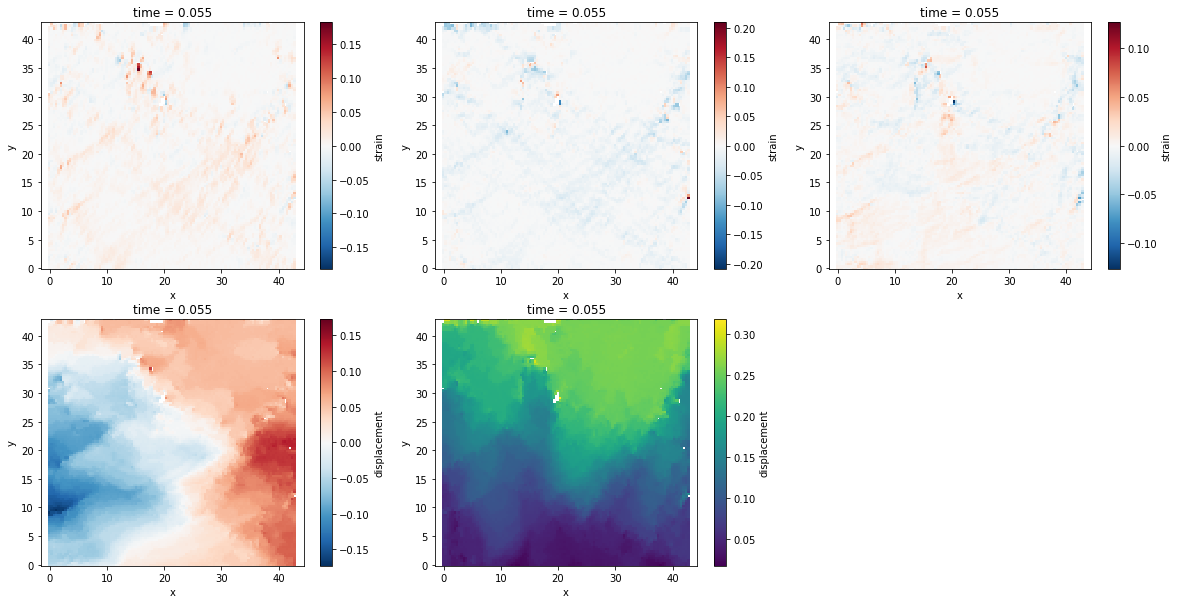

In [12]:
plt.figure(figsize=(20,10))
plt.subplot(231)
ds.strain[ts,:,:,0].plot()
plt.axis('equal')
plt.subplot(232)
ds.strain[ts,:,:,1].plot()
plt.axis('equal')
plt.subplot(233)
ds.strain[ts,:,:,3].plot()
plt.axis('equal')
plt.subplot(234)
ds.displacement[ts,:,:,0].plot()
plt.axis('equal')
plt.subplot(235)
ds.displacement[ts,:,:,1].plot()
plt.axis('equal')

## Compute the deformation equivalent

The deformation equivelent of $\varepsilon$ is given by :

$\varepsilon_{eq}=\sqrt{\frac{2}{3}\varepsilon_{ij}^d\varepsilon_{ij}^d}$

with : $\varepsilon^d=\varepsilon-\frac{1}{3}tr(\varepsilon)I$

Definition from [wikipedia](https://en.wikipedia.org/wiki/Infinitesimal_strain_theory)

In [13]:
ds['eqVonMises']=ds.strain.sT.eqVonMises()
ds['eqVM_ln']=ds.strain.sT.eqVonMises(lognorm=True)

/home/chauvet/Documents/GitGricad/lib-python/xarray_symTensor2d/xarray_symTensor2d/xarray_symTensor2d.py:35: RuntimeWarning: divide by zero encountered in log
  deq[i,...]=np.log(deq[i,...]/med[i])


In [14]:
ds

<xarray.Dataset>
Dimensions:       (d: 2, sT: 6, time: 11, x: 108, y: 108)
Coordinates:
  * time          (time) float64 0.005 0.01 0.015 0.02 ... 0.04 0.045 0.05 0.055
  * x             (x) float64 0.0 0.4 0.8 1.2 1.6 ... 41.2 41.6 42.0 42.4 42.8
  * y             (y) float64 0.0 0.4 0.8 1.2 1.6 ... 41.2 41.6 42.0 42.4 42.8
Dimensions without coordinates: d, sT
Data variables:
    displacement  (time, y, x, d) float64 -0.01382 0.02172 ... 0.05585 0.2646
    strain        (time, y, x, sT) float64 -0.0003503 0.009625 nan ... nan nan
    eqVonMises    (time, y, x) float64 0.006643 0.00459 ... 0.0008373 0.00292
    eqVM_ln       (time, y, x) float64 0.3903 0.02058 -2.378 ... -1.885 -0.6359
Attributes:
    unit_time:      macro_strain
    step_size:      0.01
    unit_position:  millimeter
    window_size:    40
    path_dat:       /data/Manips/Columnar_Ice/CI23/DIC_Analysis/nm_analysis_0...
    DIC_software:   7D

(-0.2, 43.0, -0.2, 43.0)

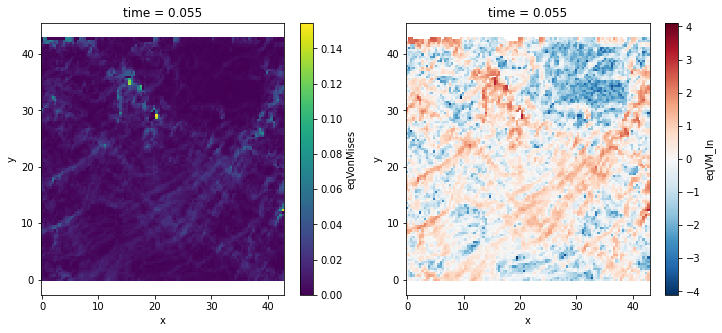

In [15]:
plt.figure(figsize=(12,5))
plt.subplot(121)
ds.eqVonMises[ts].plot()
plt.axis('equal')
plt.subplot(122)
ds.eqVM_ln[ts].plot()
plt.axis('equal')

## Compute the macroscopic strain
### Compute the average of the strain tensor

In [16]:
ds['mean_eyy']=ds.strain.sT.mean('tyy')
ds['mean_exx']=ds.strain.sT.mean('txx')

### Compute the ```DIC_line```

The ```DIC_line``` is defined in [1, section 2.2.3.1](https://tel.archives-ouvertes.fr/tel-01624418)

In [17]:
ds['dl_x']=ds.dic.DIC_line('x')
ds['dl_y']=ds.dic.DIC_line('y')

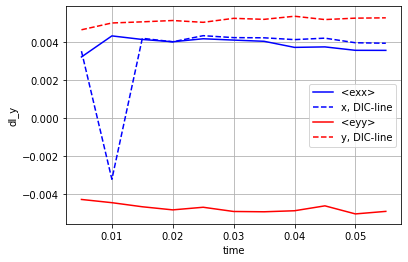

In [18]:
plt.figure()
ds.mean_exx.plot.line('b-',label='<exx>')
ds.dl_x.plot.line('b--',label='x, DIC-line')
ds.mean_eyy.plot.line('r-',label='<eyy>')
ds.dl_y.plot.line('r--',label='y, DIC-line')
plt.grid()
plt.legend()

In [19]:
ds

<xarray.Dataset>
Dimensions:       (d: 2, sT: 6, time: 11, x: 108, y: 108)
Coordinates:
  * time          (time) float64 0.005 0.01 0.015 0.02 ... 0.04 0.045 0.05 0.055
  * x             (x) float64 0.0 0.4 0.8 1.2 1.6 ... 41.2 41.6 42.0 42.4 42.8
  * y             (y) float64 0.0 0.4 0.8 1.2 1.6 ... 41.2 41.6 42.0 42.4 42.8
Dimensions without coordinates: d, sT
Data variables:
    displacement  (time, y, x, d) float64 -0.01382 0.02172 ... 0.05585 0.2646
    strain        (time, y, x, sT) float64 -0.0003503 0.009625 nan ... nan nan
    eqVonMises    (time, y, x) float64 0.006643 0.00459 ... 0.0008373 0.00292
    eqVM_ln       (time, y, x) float64 0.3903 0.02058 -2.378 ... -1.885 -0.6359
    mean_eyy      (time) float64 -0.004295 -0.004464 ... -0.005055 -0.004922
    mean_exx      (time) float64 0.003198 0.004306 ... 0.003548 0.003545
    dl_x          (time) float64 0.003503 -0.003233 ... 0.003946 0.00392
    dl_y          (time) float64 0.004627 0.004986 ... 0.005239 0.005256
Attributes:
    unit_time:      macro_strain
    step_size:      0.01
    unit_position:  millimeter
    window_size:    40
    path_dat:       /data/Manips/Columnar_Ice/CI23/DIC_Analysis/nm_analysis_0...
    DIC_software:   7D

## Extract image number each XX marcro strain

Macro strain wanted between 2 images.

In [20]:
strain_step=-0.005

offset and nb of image at each time

In [21]:
im_nb_offset=0
im_nb_time=1

Extract the number of the image

In [22]:
name_im=ds.dic.find_pic(strain_step=strain_step,a_im=im_nb_time,b_im=im_nb_offset,axis='y')

In [23]:
print(name_im)

[]


## Performed Auto Correlation analysis

In [24]:
import xarray_function.image as xfi

In [35]:
ds_auto0=xfi.auto_correlation(ds.eqVonMises[0,:,:],pad=1)

### Plot correlation length
Plot the correlation length in function of the angle. 

1. Angle = 90° correspond to **+y** direction
2. Angle = 0° correspond to **+x** direction
3. Angle = +180° correspond to **-x** direction

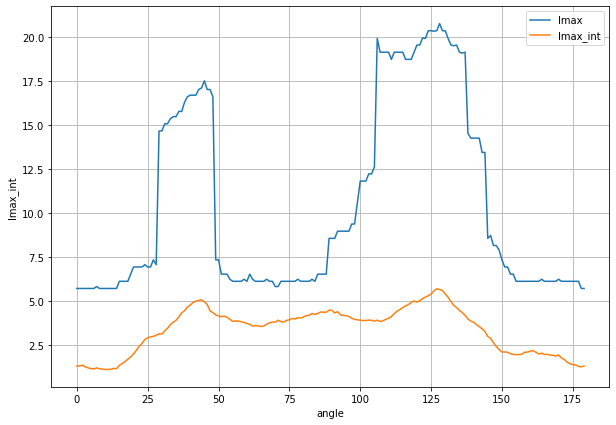

In [36]:
plt.figure(figsize=(10,7))
ds_auto0.lmax.plot(label='lmax')
ds_auto0.lmax_int.plot(label='lmax_int')
plt.grid()
plt.legend()

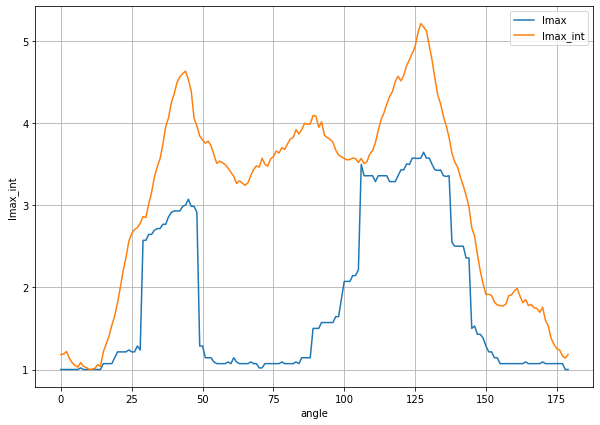

In [37]:
plt.figure(figsize=(10,7))
(ds_auto0.lmax/ds_auto0.lmax.min()).plot(label='lmax')
(ds_auto0.lmax_int/ds_auto0.lmax_int.min()).plot(label='lmax_int')
plt.grid()
plt.legend()

### Plot correlation profil along one direction
Correlation profil are compute at every integer angle between $[0,179]$. They are store in ds_auto0 and you can plot those.

You can find the angle for which the corrlation length is maximal

In [38]:
idm=np.where(ds_auto0.lmax==np.max(ds_auto0.lmax))

And plot the profil

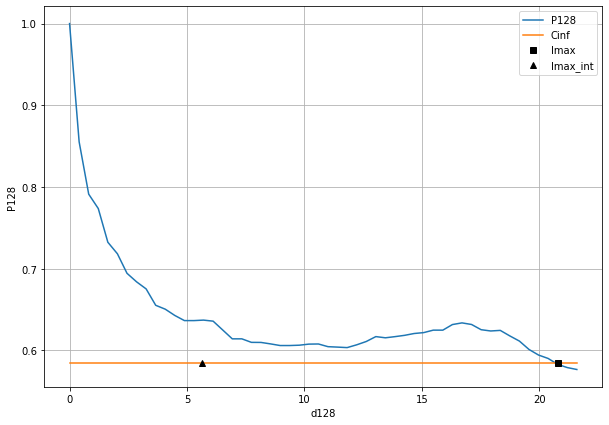

In [40]:
plt.figure(figsize=(10,7))
ds_auto0['P'+str(idm[0][0])].plot(label='P'+str(idm[0][0]))
plt.plot([0,ds_auto0['d'+str(idm[0][0])][-1]],[ds_auto0.Cinf,ds_auto0.Cinf],label='Cinf')
plt.plot(ds_auto0.lmax[idm[0][0]],ds_auto0.Cinf,'sk',label='lmax')
plt.plot(ds_auto0.lmax_int[idm[0][0]],ds_auto0.Cinf,'^k',label='lmax_int')
plt.grid()
plt.legend()